# Mushroom Classification 
## Comparison of different classification algorithms on UCI mushroom data set

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [3]:
# Download latest version of data
path = kagglehub.dataset_download("uciml/mushroom-classification")

print("Path to dataset files:", path)

mushrooms = pd.read_csv(path + '/mushrooms.csv')

Path to dataset files: /home/jonathan/.cache/kagglehub/datasets/uciml/mushroom-classification/versions/1


## Data Dictionary

Attribute Information: (classes: edible=e, poisonous=p)

    cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

    cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

    cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

    bruises: bruises=t,no=f

    odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

    gill-attachment: attached=a,descending=d,free=f,notched=n

    gill-spacing: close=c,crowded=w,distant=d

    gill-size: broad=b,narrow=n

    gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

    stalk-shape: enlarging=e,tapering=t

    stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

    stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

    stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

    stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

    stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

    veil-type: partial=p,universal=u

    veil-color: brown=n,orange=o,white=w,yellow=y

    ring-number: none=n,one=o,two=t

    ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

    spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

    population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

    habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

# Preliminary Data Exploration

In [4]:
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### All features are categorical.
### Target variable is class, with 'e' for edible and 'p' for poisonous

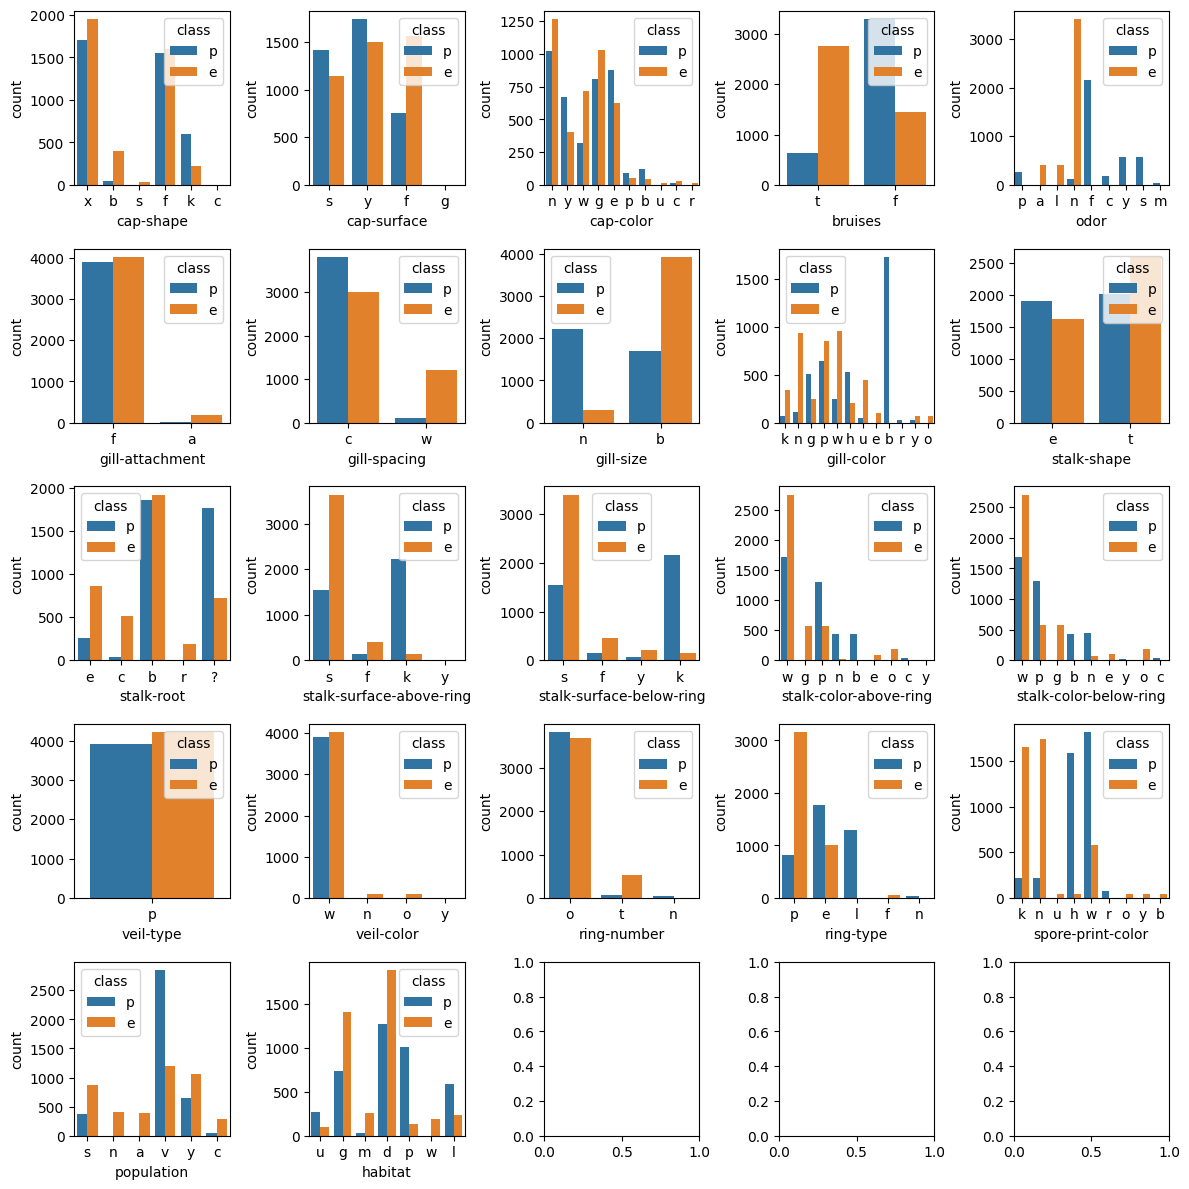

In [535]:
#Observe conditional distribution of class (edibility) on other features
fig, ax = plt.subplots(5,5, figsize = (12,12))
plot_num = 0
for feature in mushrooms.columns[1:]:
    sns.countplot(data = mushrooms, x = feature, hue = 'class', ax = ax[plot_num//5,plot_num%5])
    plot_num += 1
plt.tight_layout()

### Veil-type only has one category present ('p') so it cannot be used as a feature.
### All other features show some degree of predictive power.

In [5]:
mushrooms = mushrooms.drop(columns='veil-type')

# First Classifier - Decision Tree

### Construct a simple decision tree model and test its prediction accuracy

In [9]:
#imports
from sklearn.tree import DecisionTreeClassifier

In [58]:
# Create target variable poisonous and apply one-hot encoding to all features
poisonous = mushrooms['class'].map({'p': 1, 'e': 0})
mushroom_dummies = pd.get_dummies(mushrooms.drop(columns = 'class'), drop_first=True, dtype = int)
# Seperate into train and test data
X_train, X_test, y_train, y_test = train_test_split(mushroom_dummies, poisonous, test_size= 0.3, random_state=0)
# Instantiate and fit decision tree
decision_tree = DecisionTreeClassifier(random_state = 1)
decision_tree.fit(X_train, y_train)
dt_pred = decision_tree.predict(X_test)

In [29]:
# Print accuracy of decision tree
print(f'Accuracy: {metrics.accuracy_score(dt_pred, y_test):.5f}')

Accuracy: 1.00000


### 100% Accuracy! Is it robust to different train/test splits?

In [30]:
for n in range(5):
    X_train, X_test, y_train, y_test = train_test_split(mushroom_dummies, poisonous, test_size= 0.3, random_state=n)
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, y_train)
    dt_pred = decision_tree.predict(X_test)
    print(f'Accuracy score for random state {n}: {metrics.accuracy_score(dt_pred, y_test):.5f}')

Accuracy score for random state 0: 1.00000
Accuracy score for random state 1: 1.00000
Accuracy score for random state 2: 1.00000
Accuracy score for random state 3: 1.00000
Accuracy score for random state 4: 1.00000


In [31]:
# Examine feature importances
importances = pd.Series(decision_tree.feature_importances_, index = mushroom_dummies.columns).sort_values(ascending = False)
importances[importances > 0]

odor_n                        0.614444
stalk-root_c                  0.176114
stalk-root_r                  0.087329
spore-print-color_r           0.032822
odor_l                        0.026504
stalk-surface-below-ring_s    0.018297
stalk-surface-below-ring_y    0.013108
spore-print-color_u           0.010402
bruises_t                     0.007819
gill-size_n                   0.006296
cap-surface_g                 0.002803
population_c                  0.002067
gill-spacing_w                0.001292
cap-shape_c                   0.000702
dtype: float64

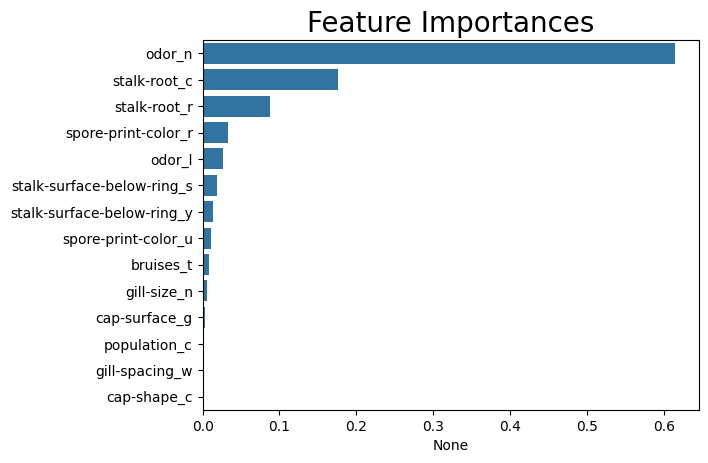

In [32]:
sns.barplot(x = importances[importances > 0],y = importances[importances > 0].index)
plt.ylabel('')
plt.title("Feature Importances", size = 20)
plt.show()

# How is this perfectly accurate?
### Let's explore the data set further:

### If we look at the data, odor identifies most poisonous mushrooms. The p, f, c, y, s, and m categories have 100% poisonous mushrooms.

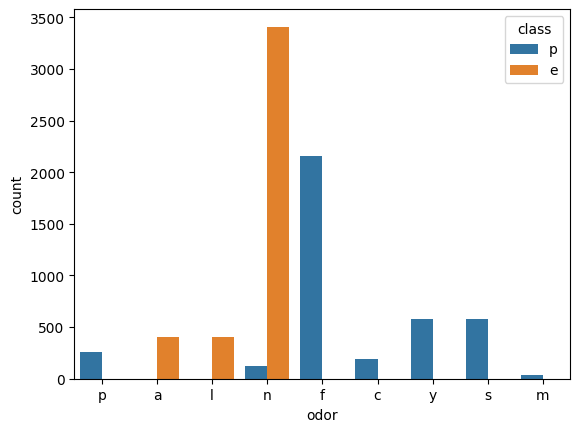

In [107]:
sns.countplot(mushrooms, x = 'odor', hue = 'class')
plt.show()

In [546]:
# The only remaining uncertainty lies with mushrooms with no ('n') odor
no_odor = mushrooms.query('odor == "n"')

### Examine conditional distributions of edibility for mushrooms with no odor

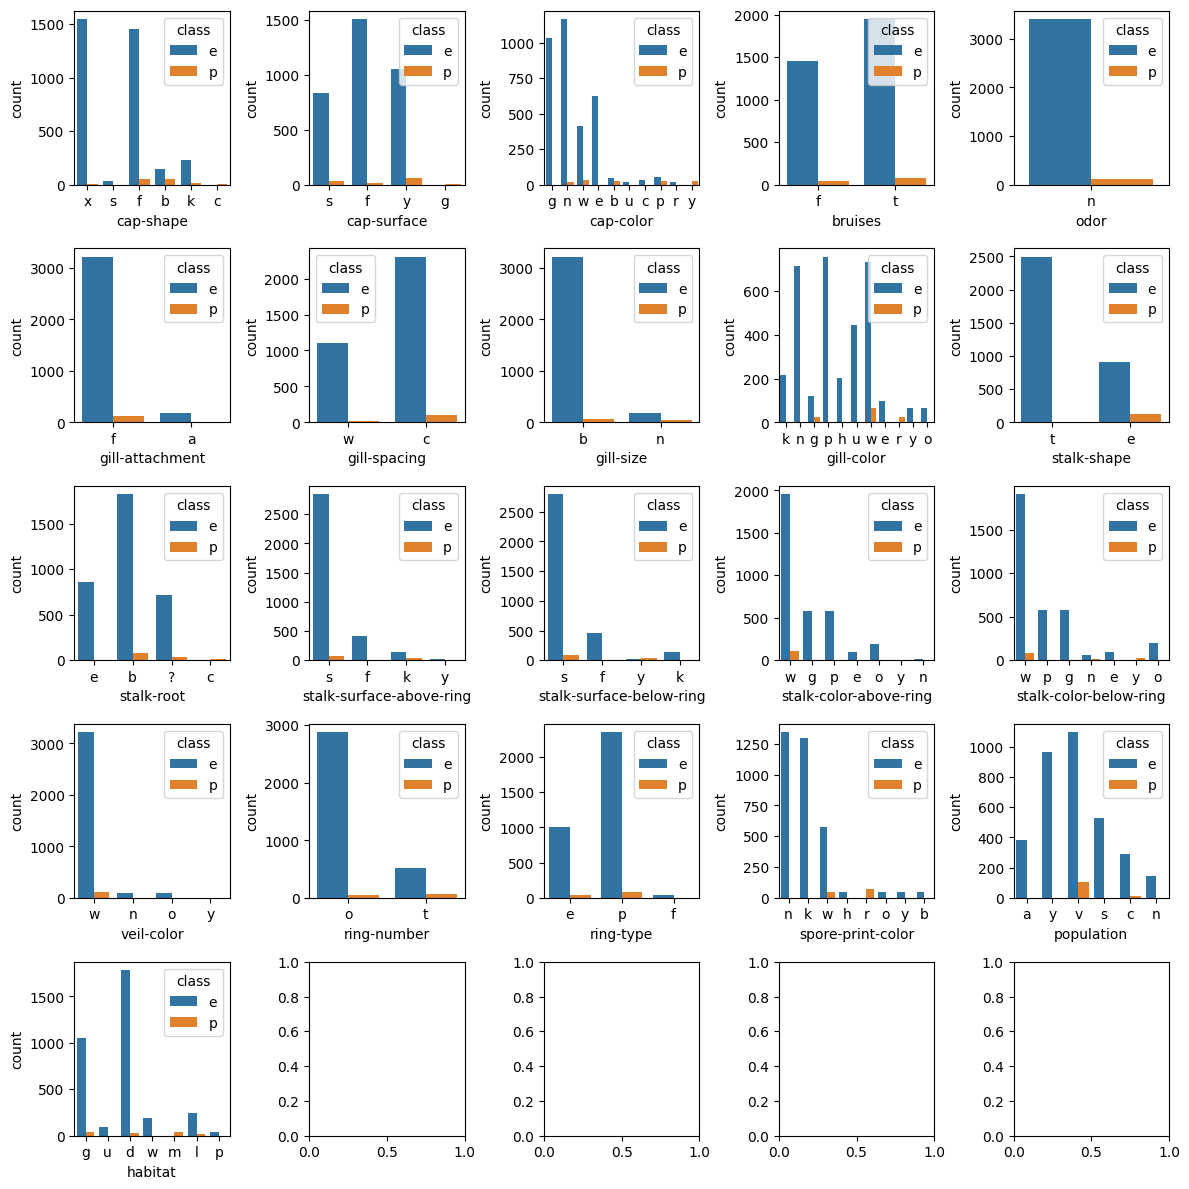

In [547]:
fig, ax = plt.subplots(5,5, figsize = (12,12))
plot_num = 0
for feature in no_odor.columns[1:]:
    sns.countplot(data = no_odor, x = feature, hue = 'class', ax = ax[plot_num//5,plot_num%5])
    plot_num += 1
plt.tight_layout()

### The stalk-color-above-ring feature only has poisonous mushrooms when white, with all other values (g, p, e, o, y, n) are completely edible.

In [549]:
no_odor_stalk_white = no_odor[no_odor['stalk-color-above-ring'] == 'w']

### Examine conditional distributions of odorless mushrooms with white stalk-color-above-ring.

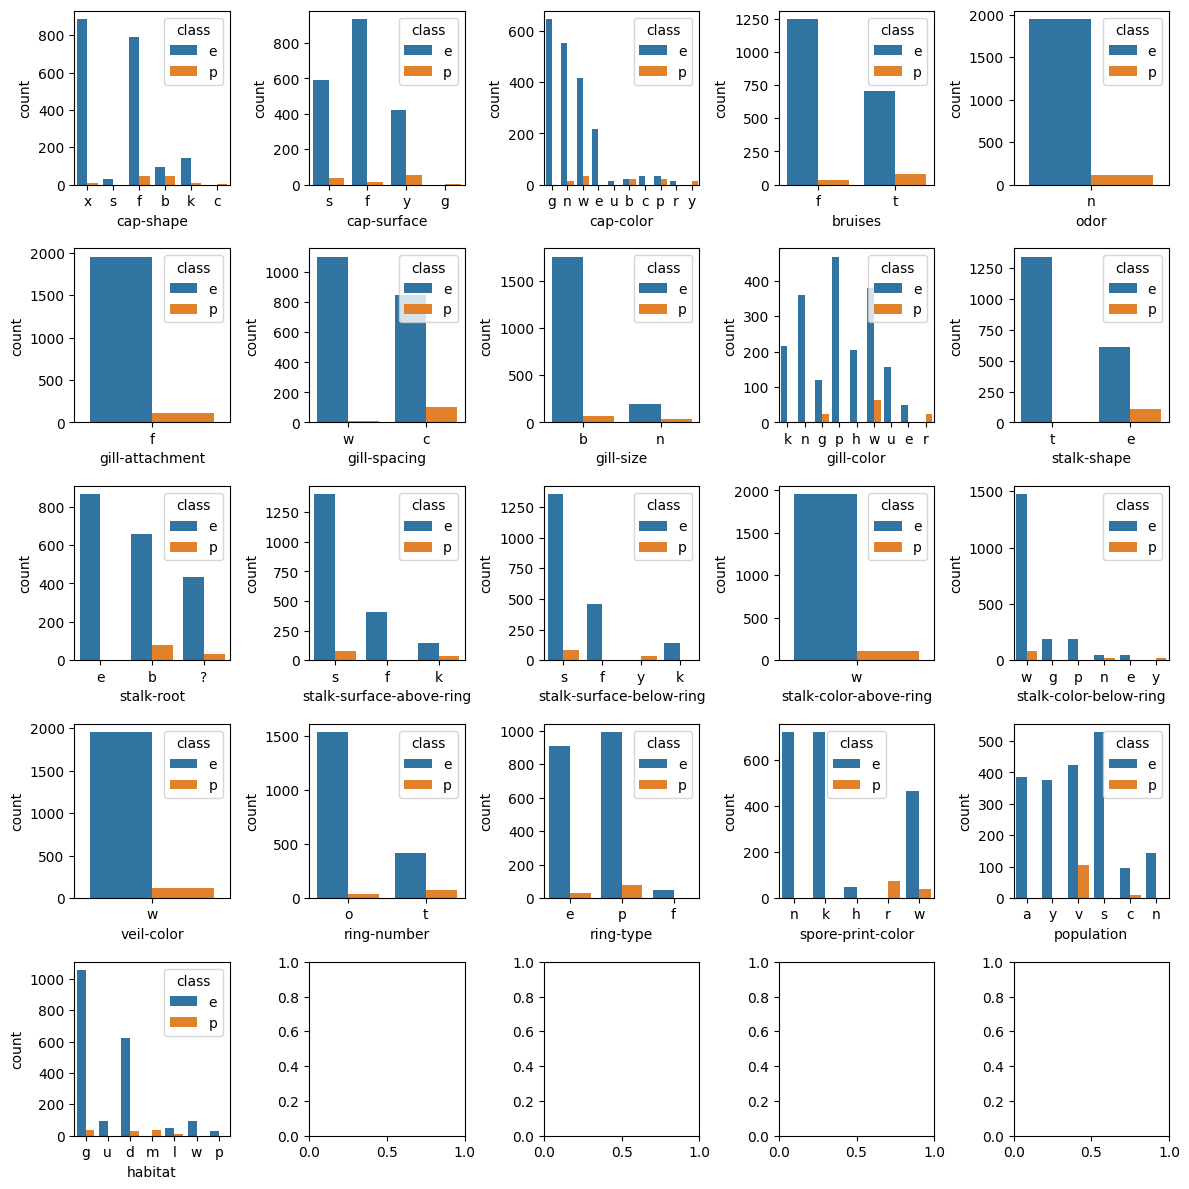

In [550]:
fig, ax = plt.subplots(5,5, figsize = (12,12))
plot_num = 0
for feature in no_odor.columns[1:]:
    sns.countplot(data = no_odor_stalk_white, x = feature, hue = 'class', ax = ax[plot_num//5,plot_num%5])
    plot_num += 1
plt.tight_layout()

### Of these remaining mushrooms, only those with white spore-print-color contain both edible and poisonous specimens

In [67]:
no_odor_stalk_white_spore_white = no_odor_stalk_white[no_odor_stalk_white['spore-print-color'] == 'w']

### Examine conditional distributions of odorless, stalk-color-above-ring = white, spore-print-color = white mushrooms

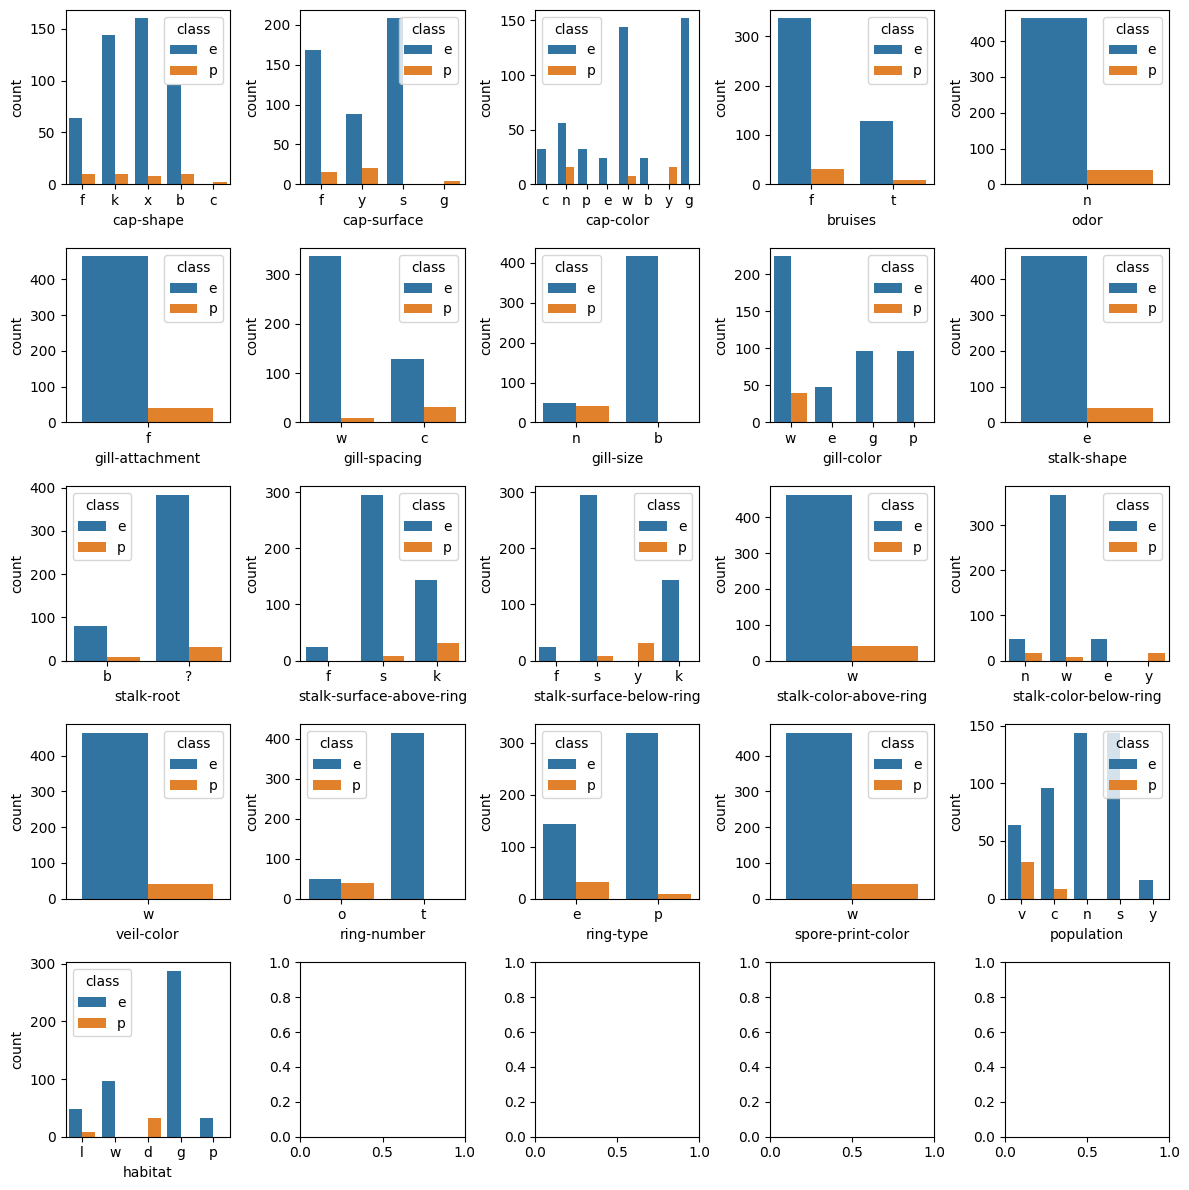

In [554]:
fig, ax = plt.subplots(5,5, figsize = (12,12))
plot_num = 0
for feature in no_odor.columns[1:]:
    sns.countplot(data = no_odor_stalk_white_spore_white, x = feature, hue = 'class', ax = ax[plot_num//5,plot_num%5])
    plot_num += 1
plt.tight_layout()

### Of these remaining entries, only those with ring-number equal to one contain mixed entries

In [69]:
noswswro = no_odor_stalk_white_spore_white[no_odor_stalk_white_spore_white['ring-number'] == 'o']

### Conditional distributions of remaining mushrooms

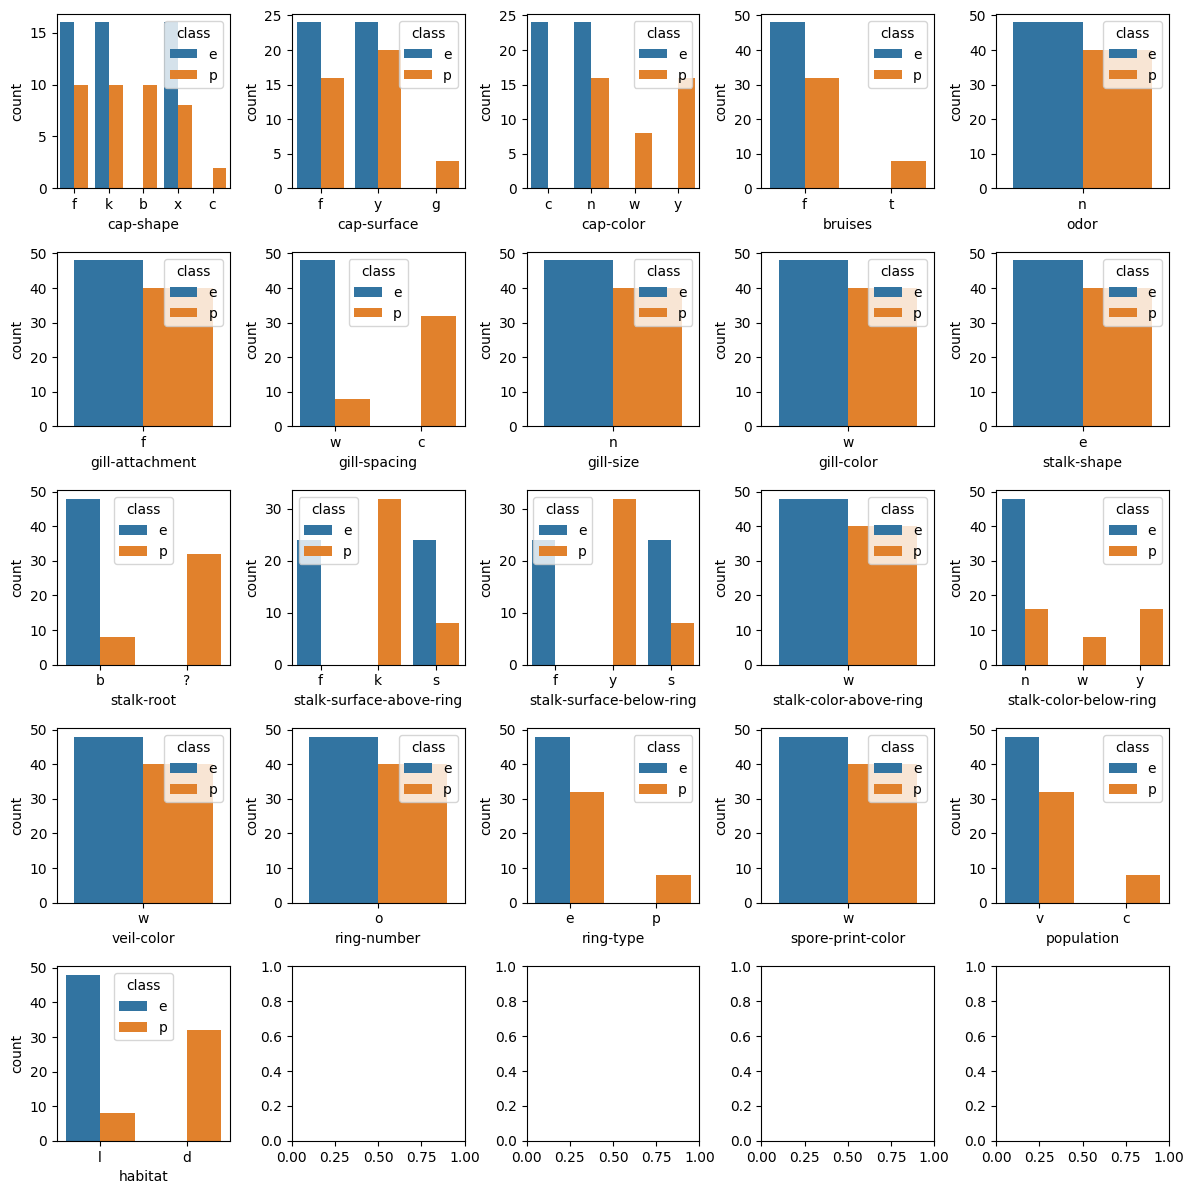

In [70]:
fig, ax = plt.subplots(5,5, figsize = (12,12))
plot_num = 0
for feature in no_odor.columns[1:]:
    sns.countplot(data = noswswro, x = feature, hue = 'class', ax = ax[plot_num//5,plot_num%5])
    plot_num += 1
plt.tight_layout()

### Next, splitting on stalk-surface-above-ring would isolate all but about 30 entries, with less than 10 poisonous.
### So, using only 5 features, almost all poisonous and edible entries have been separated. The decision tree is thus able to sort out almost all the mushrooms in relatively few splits. This can be show by limiting the depth, and therefore splits, on a tree and then seeing how it does:

In [59]:
for n in range(5):
    X_train, X_test, y_train, y_test = train_test_split(mushroom_dummies, poisonous, test_size= 0.3, random_state=n)
    decision_tree = DecisionTreeClassifier(max_depth=5)
    decision_tree.fit(X_train, y_train)
    dt_pred_limit_5 = decision_tree.predict(X_test)
    print(f'Accuracy for random state {n}: {metrics.accuracy_score(dt_pred_limit_5, y_test):.5f}')

Accuracy for random state 0: 0.99508
Accuracy for random state 1: 0.99918
Accuracy for random state 2: 0.99918
Accuracy for random state 3: 0.99590
Accuracy for random state 4: 0.99549


### The accuracy with a depth of only 5 is still very high, close to 1.0

# Odor is the most useful feature:
### What if you could not use smell, or had an untrained sense of smell? You would still want to identify the poisonous mushrooms!

In [54]:
# Remove the odor feature
mushrooms_no_smell = mushrooms.drop(columns = 'odor')

In [55]:
# One-hot encode, split, train, and predict as before
poisonous = mushrooms_no_smell['class'].map({'p': 1, 'e': 0})
mushroom_dummies = pd.get_dummies(mushrooms_no_smell.drop(columns = 'class'), drop_first=True, dtype = int)
for n in range(5):
    X_train, X_test, y_train, y_test = train_test_split(mushroom_dummies, poisonous, test_size= 0.3, random_state=n)
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, y_train)
    dt_pred_no_odor = decision_tree.predict(X_test)
    print(f'Accuracy score for random state {n}: {metrics.accuracy_score(dt_pred_no_odor, y_test):.5f}')

Accuracy score for random state 0: 1.00000
Accuracy score for random state 1: 1.00000
Accuracy score for random state 2: 1.00000
Accuracy score for random state 3: 1.00000
Accuracy score for random state 4: 1.00000


In [48]:
importances = pd.Series(decision_tree.feature_importances_, index = mushroom_dummies.columns).sort_values(ascending = False)
print(importances[importances > 0])

stalk-surface-above-ring_k    0.348842
gill-size_n                   0.309764
spore-print-color_h           0.125192
gill-spacing_w                0.089322
spore-print-color_r           0.033882
population_y                  0.025342
stalk-color-below-ring_n      0.016955
stalk-shape_t                 0.016210
bruises_t                     0.012309
ring-type_f                   0.010825
cap-shape_s                   0.008566
habitat_u                     0.002791
dtype: float64


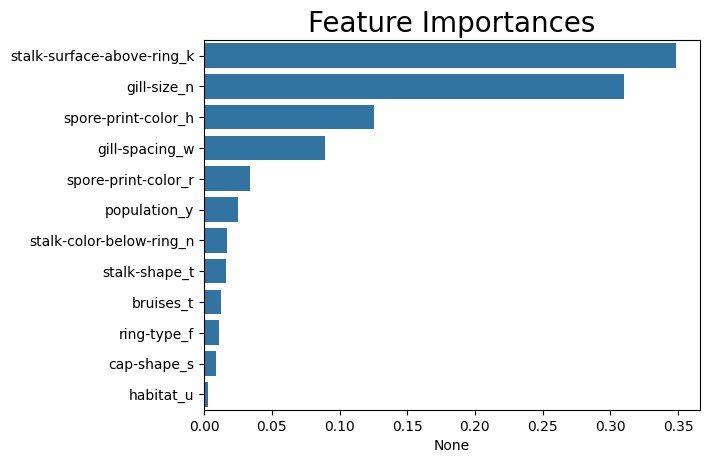

In [49]:
sns.barplot(x = importances[importances > 0],y = importances[importances > 0].index)
plt.ylabel('')
plt.title('Feature Importances', size = 20)
plt.show()

### Even without odor, the prediction accuracy is still 1.0, showing that the mushrooms can be fully classified into posionous and edible without odor. However, if we limit the depth of the tree to 5 as before, the predictive accuracy is significantly lower than with odor included.

In [60]:
for n in range(5):
    mushroom_dummies = pd.get_dummies(mushrooms_no_smell.drop(columns = 'class'), drop_first=True, dtype = int)
    X_train, X_test, y_train, y_test = train_test_split(mushroom_dummies, poisonous, test_size= 0.3, random_state=n)
    decision_tree = DecisionTreeClassifier(max_depth=5)
    decision_tree.fit(X_train, y_train)
    dt_pred_no_odor = decision_tree.predict(X_test)
    print(f'Accuracy without odor, random state {n}, depth limited to 5: {metrics.accuracy_score(dt_pred_no_odor, y_test):.5f}')
    mushroom_dummies = pd.get_dummies(mushrooms.drop(columns = 'class'), drop_first=True, dtype = int)
    X_train, X_test, y_train, y_test = train_test_split(mushroom_dummies, poisonous, test_size= 0.3, random_state=n)
    decision_tree = DecisionTreeClassifier(max_depth=5)
    decision_tree.fit(X_train, y_train)
    dt_pred_limit_5 = decision_tree.predict(X_test)
    print(f'Accuracy with odor, random state {n}. depth limited to 5: {metrics.accuracy_score(dt_pred_limit_5, y_test):.5f}')

Accuracy without odor, random state 0, depth limited to 5: 0.98811
Accuracy with odor, random state 0. depth limited to 5: 0.99508
Accuracy without odor, random state 1, depth limited to 5: 0.99180
Accuracy with odor, random state 1. depth limited to 5: 0.99918
Accuracy without odor, random state 2, depth limited to 5: 0.98687
Accuracy with odor, random state 2. depth limited to 5: 0.99918
Accuracy without odor, random state 3, depth limited to 5: 0.98687
Accuracy with odor, random state 3. depth limited to 5: 0.99590
Accuracy without odor, random state 4, depth limited to 5: 0.98852
Accuracy with odor, random state 4. depth limited to 5: 0.99549


# Simple decision trees work well for this dataset. What about other classifiers?

## Support Vector Machines

In [17]:
from sklearn.svm import SVC

In [18]:
mushroom_dummies = pd.get_dummies(mushrooms.drop(columns = 'class'), drop_first=True, dtype = int)
for n in range(5):
    X_train, X_test, y_train, y_test = train_test_split(mushroom_dummies, poisonous, test_size= 0.3, random_state=n)
    clf = SVC(kernel = 'linear').fit(X_train, y_train)
    svc_pred = clf.predict(X_test)
    print(f'Accuracy score for random state {n}: {metrics.accuracy_score(svc_pred, y_test):.5f}')

Accuracy score for random state 0: 1.00000
Accuracy score for random state 1: 1.00000
Accuracy score for random state 2: 1.00000
Accuracy score for random state 3: 1.00000
Accuracy score for random state 4: 1.00000


In [139]:
coefficients = pd.Series(clf.coef_[0], index = mushroom_dummies.columns).abs().sort_values(ascending = False)
print('Coefficienct for linear SVC')
print(coefficients[coefficientsfficients > 0.5])

Coefficienct for linear SVC
spore-print-color_r           1.989077
odor_c                        1.530971
odor_p                        1.076371
stalk-surface-above-ring_k    1.040739
population_c                  0.993855
gill-size_n                   0.961560
gill-spacing_w                0.930989
odor_n                        0.928632
stalk-root_r                  0.810035
odor_f                        0.782024
spore-print-color_u           0.777547
spore-print-color_k           0.777514
spore-print-color_n           0.777507
ring-type_f                   0.647982
habitat_w                     0.614711
stalk-surface-below-ring_y    0.599736
odor_s                        0.577523
odor_y                        0.577481
stalk-root_b                  0.560169
dtype: float64


In [19]:
# Odor removed
mushrooms_no_smell = mushrooms.drop(columns = 'odor')
mushroom_dummies = pd.get_dummies(mushrooms_no_smell.drop(columns = 'class'), drop_first=True, dtype = int)
for n in range(5):
    X_train, X_test, y_train, y_test = train_test_split(mushroom_dummies, poisonous, test_size= 0.3, random_state=n)
    clf = SVC(kernel = 'linear').fit(X_train, y_train)
    svc_pred = clf.predict(X_test)
    print(f'Accuracy score for random state {n}: {metrics.accuracy_score(svc_pred, y_test):.5f}')

Accuracy score for random state 0: 1.00000
Accuracy score for random state 1: 1.00000
Accuracy score for random state 2: 1.00000
Accuracy score for random state 3: 1.00000
Accuracy score for random state 4: 1.00000


In [147]:
coefficients = pd.Series(clf.coef_[0], index = mushroom_dummies.columns).abs().sort_values(ascending = False)
coefficients[coefficients > 0.5]

ring-type_f                   4.760683
stalk-shape_t                 3.077292
stalk-color-below-ring_n      3.024439
stalk-surface-above-ring_k    2.754445
ring-number_t                 2.242073
stalk-root_r                  2.215607
gill-size_n                   2.176931
spore-print-color_r           2.125245
ring-number_o                 1.856756
stalk-root_c                  1.760588
stalk-root_e                  1.645342
spore-print-color_u           1.603803
stalk-root_b                  1.531593
bruises_t                     1.369396
gill-spacing_w                1.254776
stalk-color-below-ring_p      1.248531
stalk-color-below-ring_w      1.248511
spore-print-color_h           1.103800
gill-color_w                  1.080753
gill-color_n                  1.080700
gill-color_k                  1.080691
gill-color_p                  1.080650
gill-color_g                  1.080507
gill-color_h                  1.000000
spore-print-color_n           0.973362
spore-print-color_k      

### Perfect accuracy (1.0) with/without odor feature, and is robust to changing train/test splits.

## K Nearest Neighbors

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# With odor, for different values of n neighbors
mushroom_dummies = pd.get_dummies(mushrooms.drop(columns = 'class'), drop_first=True, dtype = int)
for n in range(5):
    X_train, X_test, y_train, y_test = train_test_split(mushroom_dummies, poisonous, test_size= 0.3, random_state=n)
    print(f"Random State for train/test split: {n}")
    for k in [2,5,10,20,50]:
        knnclf = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
        knn_pred = knnclf.predict(X_test)
        print(f'   Accuracy for classifier based on {k} neighbors: {metrics.accuracy_score(knn_pred, y_test):.5f}')

Random State for train/test split: 0
   Accuracy for classifier based on 2 neighbors: 1.00000
   Accuracy for classifier based on 5 neighbors: 1.00000
   Accuracy for classifier based on 10 neighbors: 1.00000
   Accuracy for classifier based on 20 neighbors: 0.99918
   Accuracy for classifier based on 50 neighbors: 0.99795
Random State for train/test split: 1
   Accuracy for classifier based on 2 neighbors: 1.00000
   Accuracy for classifier based on 5 neighbors: 1.00000
   Accuracy for classifier based on 10 neighbors: 0.99795
   Accuracy for classifier based on 20 neighbors: 0.99795
   Accuracy for classifier based on 50 neighbors: 0.99672
Random State for train/test split: 2
   Accuracy for classifier based on 2 neighbors: 1.00000
   Accuracy for classifier based on 5 neighbors: 1.00000
   Accuracy for classifier based on 10 neighbors: 0.99877
   Accuracy for classifier based on 20 neighbors: 0.99877
   Accuracy for classifier based on 50 neighbors: 0.99877
Random State for train/te

In [15]:
# Without odor
mushrooms_no_smell = mushrooms.drop(columns = 'odor')
mushroom_dummies = pd.get_dummies(mushrooms_no_smell.drop(columns = 'class'), drop_first=True, dtype = int)
for n in range(5):
    X_train, X_test, y_train, y_test = train_test_split(mushroom_dummies, poisonous, test_size= 0.3, random_state=n)
    print(f"Random State for train/test split: {n}")
    for k in [2,5,10,20,50]:
        knnclf = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
        knn_pred = knnclf.predict(X_test)
        print(f'   Accuracy for classifier based on {k} neighbors: {metrics.accuracy_score(knn_pred, y_test):.5f}')

Random State for train/test split: 0
   Accuracy for classifier based on 2 neighbors: 0.99959
   Accuracy for classifier based on 5 neighbors: 1.00000
   Accuracy for classifier based on 10 neighbors: 1.00000
   Accuracy for classifier based on 20 neighbors: 0.99918
   Accuracy for classifier based on 50 neighbors: 0.99918
Random State for train/test split: 1
   Accuracy for classifier based on 2 neighbors: 0.99959
   Accuracy for classifier based on 5 neighbors: 1.00000
   Accuracy for classifier based on 10 neighbors: 0.99795
   Accuracy for classifier based on 20 neighbors: 0.99795
   Accuracy for classifier based on 50 neighbors: 0.99795
Random State for train/test split: 2
   Accuracy for classifier based on 2 neighbors: 0.99959
   Accuracy for classifier based on 5 neighbors: 1.00000
   Accuracy for classifier based on 10 neighbors: 0.99877
   Accuracy for classifier based on 20 neighbors: 0.99877
   Accuracy for classifier based on 50 neighbors: 0.99877
Random State for train/te

### The K Nearest Neighbors (KNN) clustering algorithm obtains good performance, and for all train/test splits the 5 neighbor classifier has perfect accuracy
### Removing odor has a slight worsening effect on the classifier accuracy (though not for all examples, as shown by the random state 0, 50 neighbors classifier)

## Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
mushroom_dummies = pd.get_dummies(mushrooms.drop(columns = 'class'), drop_first=True, dtype = int)
for n in range(5):
    X_train, X_test, y_train, y_test = train_test_split(mushroom_dummies, poisonous, test_size= 0.3, random_state = n)
    rf_clf = RandomForestClassifier().fit(X_train, y_train)
    rf_pred = rf_clf.predict(X_test)
    print(f'Accuracy score for random state {n}: {metrics.accuracy_score(rf_pred, y_test):.5f}')

Accuracy score for random state 0: 1.00000
Accuracy score for random state 1: 1.00000
Accuracy score for random state 2: 1.00000
Accuracy score for random state 3: 1.00000
Accuracy score for random state 4: 1.00000


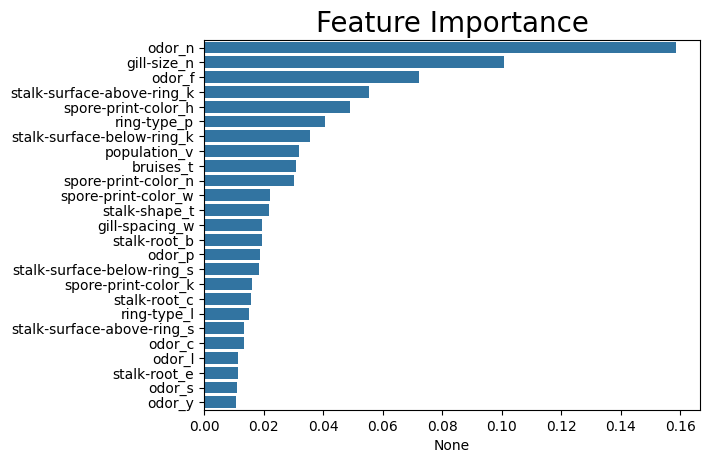

In [185]:
importances = pd.Series(rf_clf.feature_importances_, index = mushroom_dummies.columns).sort_values(ascending = False)
sns.barplot(x = importances[importances > 0.01],y = importances[importances > 0.01].index)
plt.ylabel('')
plt.title('Feature Importance', size = 20)
plt.show()

In [64]:
# Removing odor
mushrooms_no_smell = mushrooms.drop(columns = 'odor')
mushroom_dummies = pd.get_dummies(mushrooms_no_smell.drop(columns = 'class'), drop_first=True, dtype = int)
for n in range(5):
    X_train, X_test, y_train, y_test = train_test_split(mushroom_dummies, poisonous, test_size= 0.3, random_state=n)
    rf_clf = RandomForestClassifier().fit(X_train, y_train)
    rf_pred = rf_clf.predict(X_test)
    print(f'Accuracy score for random state {n}: {metrics.accuracy_score(rf_pred, y_test):.5f}')

Accuracy score for random state 0: 1.00000
Accuracy score for random state 1: 1.00000
Accuracy score for random state 2: 1.00000
Accuracy score for random state 3: 1.00000
Accuracy score for random state 4: 1.00000


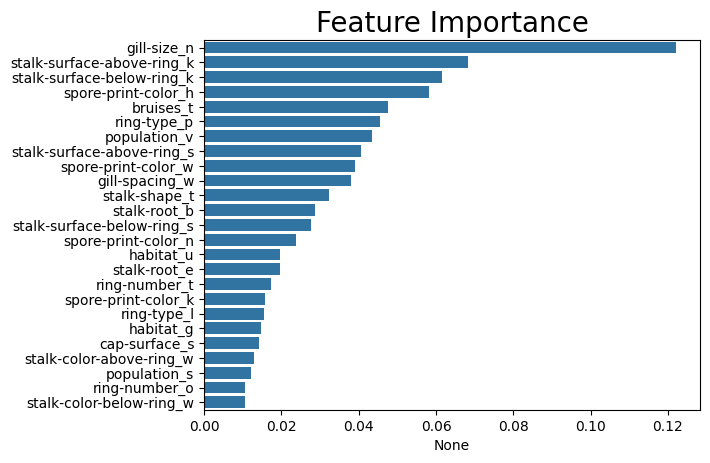

In [472]:
importances = pd.Series(rf_clf.feature_importances_, index = mushroom_dummies.columns).sort_values(ascending = False)
sns.barplot(x = importances[importances > 0.01],y = importances[importances > 0.01].index)
plt.ylabel('')
plt.title('Feature Importance', size = 20)
plt.show()

### The random forest classifier easily classifies the poisonous mushrooms, and has no trouble with odor removed or with different train/test splits

## XGBoost

In [67]:
import xgboost as xgb

In [68]:
mushroom_dummies = pd.get_dummies(mushrooms.drop(columns = 'class'), drop_first=True, dtype = int)
for n in range(5):
    X_train, X_test, y_train, y_test = train_test_split(mushroom_dummies, poisonous, test_size= 0.3, random_state = n)
    clf = xgb.XGBClassifier().fit(X_train, y_train)
    xgb_pred = clf.predict(X_test)
    print(f'Accuracy for random state {n}: {metrics.accuracy_score(xgb_pred, y_test):.5f}')

Accuracy for random state 0: 1.00000
Accuracy for random state 1: 1.00000
Accuracy for random state 2: 1.00000
Accuracy for random state 3: 1.00000
Accuracy for random state 4: 1.00000


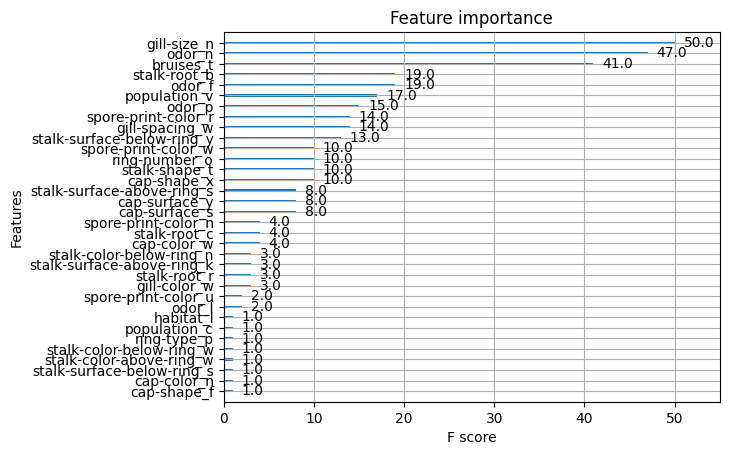

In [69]:
xgb.plot_importance(clf)
plt.show()

In [70]:
# Removing odor
mushrooms_no_smell = mushrooms.drop(columns = 'odor')
mushroom_dummies = pd.get_dummies(mushrooms_no_smell.drop(columns = 'class'), drop_first=True, dtype = int)
for n in range(5):
    X_train, X_test, y_train, y_test = train_test_split(mushroom_dummies, poisonous, test_size= 0.3, random_state = n)
    clf = xgb.XGBClassifier().fit(X_train, y_train)
    xgb_pred = clf.predict(X_test)
    print(f'Accuracy for random state {n}: {metrics.accuracy_score(xgb_pred, y_test):.5f}')

Accuracy for random state 0: 1.00000
Accuracy for random state 1: 1.00000
Accuracy for random state 2: 1.00000
Accuracy for random state 3: 1.00000
Accuracy for random state 4: 1.00000


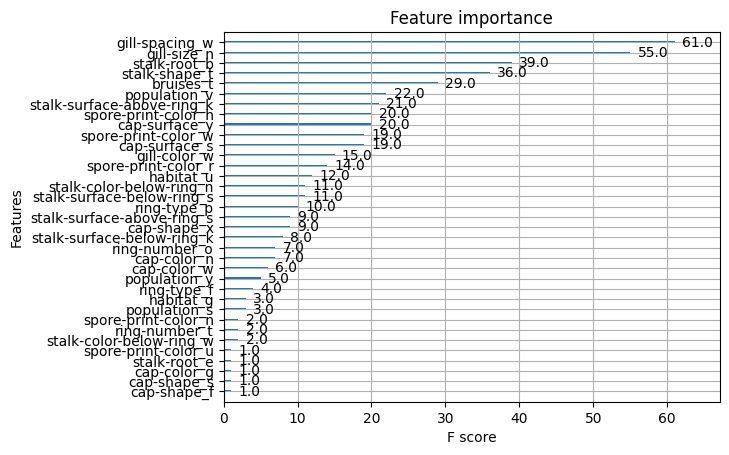

In [71]:
xgb.plot_importance(clf)
plt.show()

### XGBoost has perfect (1.0) predictive accuracy with or without odor as a feature and this holds for all different training/test splits

## Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
mushroom_dummies = pd.get_dummies(mushrooms.drop(columns = 'class'), drop_first=True, dtype = int)
for n in range(5):
    X_train, X_test, y_train, y_test = train_test_split(mushroom_dummies, poisonous, test_size= 0.3, random_state=n)
    log_reg = LogisticRegression().fit(X_train, y_train)
    log_pred = log_reg.predict(X_test)
    print(f'Accuracy for random state {n}: {metrics.accuracy_score(log_pred, y_test):.5f}')

Accuracy for random state 0: 0.99959
Accuracy for random state 1: 0.99836
Accuracy for random state 2: 0.99918
Accuracy for random state 3: 0.99836
Accuracy for random state 4: 1.00000


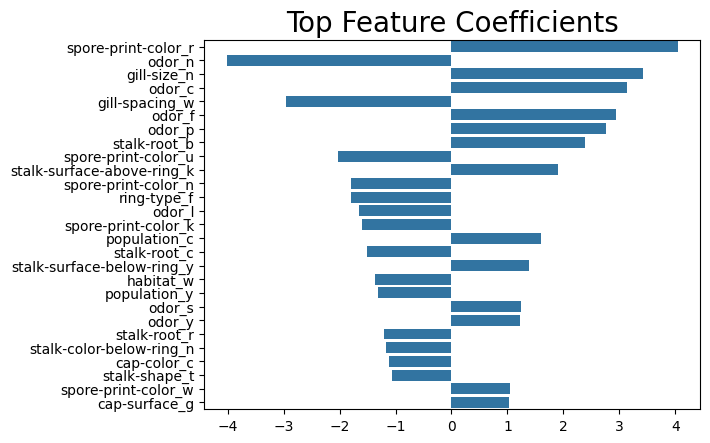

In [75]:
coefficients = pd.Series(log_reg.coef_[0], index = mushroom_dummies.columns).sort_values(key = abs, ascending = False)
sns.barplot(x = coefficients[coefficients.abs() > 1], y = coefficients[coefficients.abs() > 1].index)
plt.ylabel('')
plt.xlabel('')
plt.title('Top Feature Coefficients', size = 20)
plt.show()

In [77]:
# Removing odor
mushrooms_no_smell = mushrooms.drop(columns = 'odor')
mushroom_dummies = pd.get_dummies(mushrooms_no_smell.drop(columns = 'class'), drop_first=True, dtype = int)
for n in range(5):
    X_train, X_test, y_train, y_test = train_test_split(mushroom_dummies, poisonous, test_size= 0.3, random_state = n)
    log_reg = LogisticRegression().fit(X_train, y_train)
    log_pred = log_reg.predict(X_test)
    print(f'Accuracy: {metrics.accuracy_score(log_pred, y_test):.5f}')

Accuracy: 0.99672
Accuracy: 0.99713
Accuracy: 0.99426
Accuracy: 0.99549
Accuracy: 0.99590


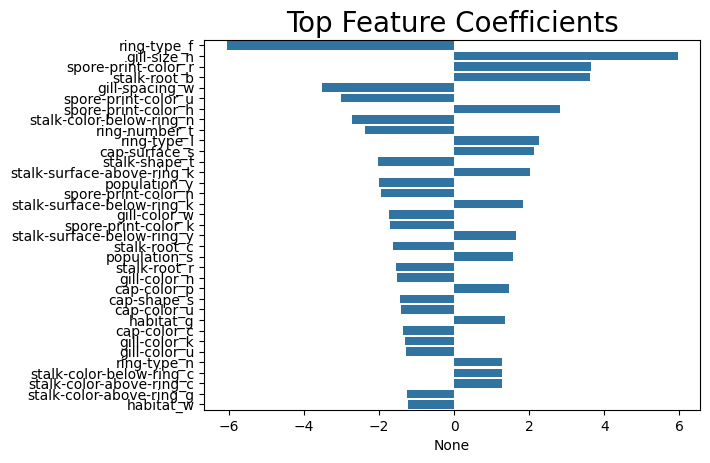

In [78]:
coefficients = pd.Series(log_reg.coef_[0], index = mushroom_dummies.columns).sort_values(key = abs, ascending = False)
sns.barplot(x = coefficients[coefficients.abs() > 1.2], y = coefficients[coefficients.abs() > 1.2].index)
plt.ylabel('')
plt.title('Top Feature Coefficients', size = 20)
plt.show()

### Logistic regression using all features gets close to 1.0 accuracy but falls short, and when removing odor, falls further short. Regression classification does not seem to be ideal for this data with a large number of categorical features

## Will applying forward selection and limiting to 20 features help?

In [79]:
from sklearn.feature_selection import SequentialFeatureSelector

### Use forward selection to select best 20 features from the one-hot-encoded feature set:

In [81]:
mushroom_dummies = pd.get_dummies(mushrooms.drop(columns = 'class'), drop_first=True, dtype = int)
X_train, X_test, y_train, y_test = train_test_split(mushroom_dummies, poisonous, test_size= 0.3, random_state=0)
log_reg = LogisticRegression()

sfs = SequentialFeatureSelector(log_reg, n_features_to_select=20)
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LogisticRegression(),
                          n_features_to_select=20)

In [82]:
mushroom_dummies_reduced = mushroom_dummies[sfs.get_feature_names_out()]
for n in range(5):
    X_train, X_test, y_train, y_test = train_test_split(mushroom_dummies_reduced, poisonous, test_size= 0.3, random_state=n)
    log_reg = LogisticRegression().fit(X_train, y_train)
    log_pred = log_reg.predict(X_test)
    print(f'Accuracy for random state {n}: {metrics.accuracy_score(log_pred, y_test):.5f}')

Accuracy for random state 0: 0.99549
Accuracy for random state 1: 0.99713
Accuracy for random state 2: 0.99795
Accuracy for random state 3: 0.99672
Accuracy for random state 4: 0.99549


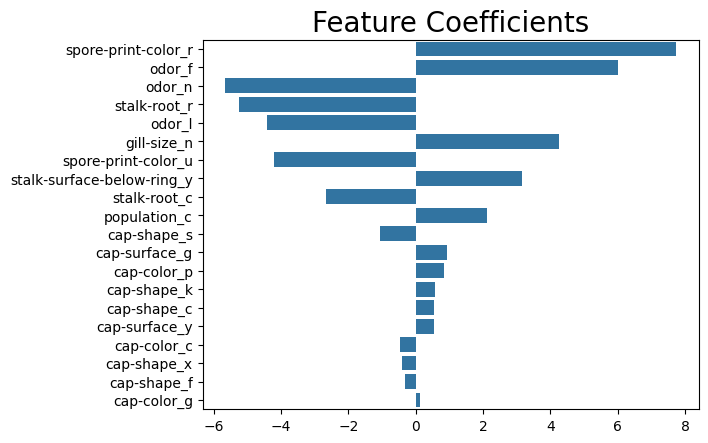

In [83]:
coefficients = pd.Series(log_reg.coef_[0], sfs.get_feature_names_out()).sort_values(key = abs, ascending = False)
sns.barplot(x = coefficients, y = coefficients.index)
plt.xlabel('')
plt.ylabel('')
plt.title('Feature Coefficients', size = 20)
plt.show()

###  Forward selection takes away some predictive power. The model, however, is simpler. For a smallish data set such as this one, this does little good.

## Perhaps a Lasso Linear Regression will yield better results

In [85]:
from sklearn.linear_model import Lasso

In [131]:
mushroom_dummies = pd.get_dummies(mushrooms.drop(columns = 'class'), drop_first=True, dtype = int)
df = pd.DataFrame()
for n in range(5):
    X_train, X_test, y_train, y_test = train_test_split(mushroom_dummies, poisonous, test_size= 0.3, random_state=n)
    las_clf = Lasso(alpha = 0.0001, max_iter=10000).fit(X_train, y_train)
    scores = pd.Series({x:metrics.accuracy_score(pd.Series(las_clf.predict(X_test)) > x, y_test) for x in np.arange(0,1.1, 0.1)}, name  = n)
    df = pd.concat([df, scores], axis = 1)
df.index.name = 'Cutoff Value'
df.columns.name = 'Random State'
print('Accuracy Chart for different splits vs. cutoff values')
df

Accuracy Chart for different splits vs. cutoff values


Random State,0,1,2,3,4
Cutoff Value,,,,,
0.0,0.703035,0.714930,0.697293,0.694011,0.679245
0.1,0.996719,0.997539,0.994258,0.993437,0.997129
0.2,1.000000,1.000000,1.000000,1.000000,1.000000
0.3,1.000000,0.999180,0.999180,1.000000,1.000000
0.4,1.000000,0.999180,0.999180,0.998359,1.000000
0.5,0.999590,0.998359,0.999180,0.998359,1.000000
0.6,0.999590,0.998359,0.999180,0.998359,1.000000
0.7,0.999590,0.997949,0.999180,0.998359,1.000000
0.8,0.999180,0.997949,0.998769,0.998359,1.000000


### Interestingly, for the cutoff value of 0.2, the Lasso Linear Regression maintains perfect predictability over the 5 splits (this would almost certainly not hold for all train/test splits)
### Overall, the Lasso algorithm has pretty good predictive power for the data set, though it usually falls short of perfect accuracy

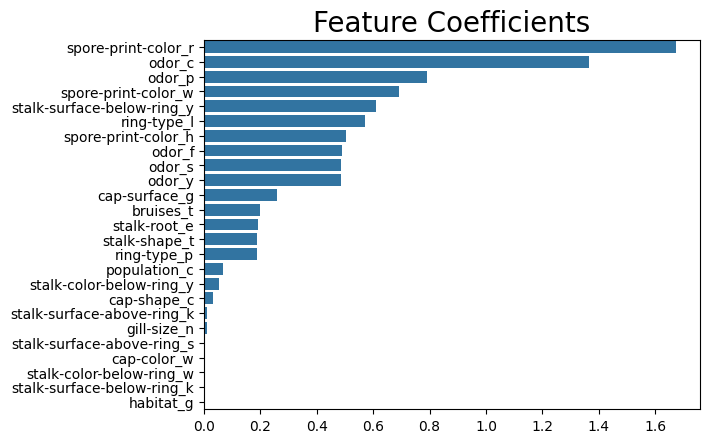

In [132]:
# Lasso coefficients for last iteration (random state 4)
coefficients = pd.Series(las_clf.coef_, index = mushroom_dummies.columns).sort_values(key = abs, ascending = False)
sns.barplot(x = coefficients[coefficients > 0], y = coefficients[coefficients > 0].index)
plt.ylabel('')
plt.xlabel('')
plt.title('Feature Coefficients', size = 20)
plt.show()

### Removing odor

In [133]:
mushrooms_no_smell = mushrooms.drop(columns = 'odor')
mushroom_dummies = pd.get_dummies(mushrooms_no_smell.drop(columns = 'class'), drop_first=True, dtype = int)
df = pd.DataFrame()
for n in range(5):
    X_train, X_test, y_train, y_test = train_test_split(mushroom_dummies, poisonous, test_size= 0.3, random_state=n)
    las_clf = Lasso(alpha = 0.0001, max_iter=10000).fit(X_train, y_train)
    scores = pd.Series({x:metrics.accuracy_score(pd.Series(las_clf.predict(X_test)) > x, y_test) for x in np.arange(0,1.1, 0.1)}, name  = n)
    df = pd.concat([df, scores], axis = 1)
df.index.name = 'Cutoff Value'
df.columns.name = 'Random State'
print('Accuracy Chart for different splits vs. cutoff values')
df

Accuracy Chart for different splits vs. cutoff values


Random State,0,1,2,3,4
Cutoff Value,,,,,
0.0,0.703445,0.737080,0.721493,0.720673,0.730107
0.1,0.979902,0.985234,0.983183,0.980722,0.978671
0.2,0.981952,0.987285,0.986054,0.981952,0.981952
0.3,0.986054,0.990566,0.988925,0.986874,0.987695
0.4,0.999590,0.999180,0.999180,0.995078,0.998359
0.5,0.999590,0.998359,0.999180,0.998359,1.000000
0.6,0.999590,0.998359,0.999180,0.998359,1.000000
0.7,0.999590,0.997539,0.999180,0.998359,1.000000
0.8,0.994668,0.990976,0.994258,0.993847,0.997129


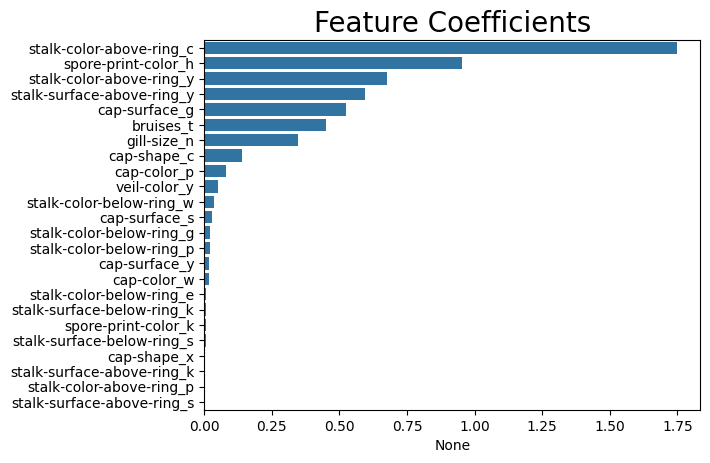

In [134]:
# Lasso coefficients without odor feature for last iteration (random state 4)
coefficients = pd.Series(las_clf.coef_, index = mushroom_dummies.columns).sort_values(key = abs, ascending = False)
sns.barplot(x = coefficients[coefficients > 0], y = coefficients[coefficients > 0].index)
plt.ylabel('')
plt.title('Feature Coefficients', size = 20)
plt.show()

### Without odor, lasso linear regression loses some predictive power.

# Conclusion: Many algorithms perfectly predict poisonous mushrooms.
### Tree based methods (Simple Decision Tree, Random Forest, XGBoost) are able to perfectly predict the poisonous mushrooms as the data can be easily grouped into clear poisonous and edible groups, even when the single best predictor (odor) is removed.
### Support Vector Machine Classifier also fully predicts poisonous mushrooms

### Clustering with  the K Nearest Neighbors algorithm does not acheive 100% accuracy for all values of k, though it is not far off. 

### Logistic Regression and Lasso Linear Regression perform the poorest, though for certain cut-off values Lasso Linear Regression has 1.0 accuracy.